<a href="https://colab.research.google.com/github/wallisonferreira/analise-exploratoria-mercados/blob/master/pre-processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Pré-processamento

<p style="text-align:justify">Neste arquivo serão realizadas tarefas de manipulação de dados usando técnicas de seleção, tratamento e exclusão de valores vazios, transformação e junção de dados. Esta tarefa é pré-requisito para a qualidade da visualização e análise de dados. Os dados serão transformados para um formato conveniente a fim de diminuir os impactos sobre a etapa de análise de dados.</p>

In [3]:
# invite people to the party
import pandas as pd
import numpy as np
!pip install quandl
import quandl

#### Oil Price

Nesta seção será feito a importação e ajustes necessários sobre os dados do preço do óleo. Estes dados são fornecidos pelo Quandl através de sua API. Abaixo, utilizando a função get do Quandl API, importaremos os dados no formato conveniente para o python. Utilizaremos, primordialmente, a biblioteca pandas como um recipiente para manipulação de tabelas em grande parte do nosso trabalho.

In [89]:
# importando os dados
oil_price = quandl.get("OPEC/ORB", start_date="2009-01-01", end_date="2019-05-30")

In [90]:
# reseta o index
oil_price.reset_index(inplace=True)

In [91]:
# visualizando as colunas
oil_price.columns

Index(['Date', 'Value'], dtype='object')

In [92]:
# renomeando a coluna
oil_price.rename(columns={"Value":"OilPrice"}, inplace=True)

In [93]:
# visualizando os dados
oil_price.head()

,Date,OilPrice
0,2009-01-02,40.44
1,2009-01-05,43.98
2,2009-01-06,46.32
3,2009-01-07,45.43
4,2009-01-08,42.06


In [ ]:
# salvando o arquivo
#oil_price.to_csv("/content/drive/My Drive/Análise Exploratória/Dados/oil_price.csv")

####S&P500

Nesta seção, repetiremos todo o processo anterior para os dados de S&P500.

In [4]:
# importando os dados
sp500 = pd.read_csv("/content/drive/My Drive/Análise Exploratória/Dados/HistoricalPrices-2.csv")

In [5]:
# remove espaços do nome das colunas
sp500.columns = sp500.columns.str.replace(' ','')

In [6]:
# transforma a coluna date para datetime
sp500['Date'] = sp500['Date'].astype('datetime64[ns]')

In [7]:
# visualizando tipos dos dados
sp500.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [8]:
# seleciona colunas
sp500 = sp500[['Date', 'Close']]

In [9]:
# ordenando os dados
sp500 = sp500.sort_values(['Date'], ascending = True)

In [10]:
# visualizando os dados
sp500.head()

,Date,Close
2617,2009-01-05,927.45
2616,2009-01-06,934.70
2615,2009-01-07,906.65
2614,2009-01-08,909.73
2613,2009-01-09,890.35


In [ ]:
# criando uma lista de index para S&P500
i = pd.Series(list(range(0, len(sp500))))

In [ ]:
# setando o index para S&P500
sp500.set_index(i, inplace=True)

In [ ]:
# visualizando os dados
sp500.head()

,Date,Close
0,2009-01-05,927.45
1,2009-01-06,934.70
2,2009-01-07,906.65
3,2009-01-08,909.73
4,2009-01-09,890.35


In [ ]:
# salvando arquivo
#sp500.to_csv("/content/drive/My Drive/Análise Exploratória/Dados/sp500.csv")

#### Market Data

Nesta seção faremos com mais cautela uma análise mais aprofundada sobre a planilha de dados de mercado. Lembrando que ainda não juntamos os dados anteriores a esta tabela específica.

In [11]:
# importando os dados
market = pd.read_csv("/content/drive/My Drive/Análise Exploratória/Dados/market_data.v4.csv", sep=";")

In [12]:
# removendo espaços dos nomes das colunas
market.columns = market.columns.str.replace(" ", "")

In [13]:
# tranformando data para datetime
market['Date'] = market['Date'].astype('datetime64[ns]')

In [14]:
# removendo linhas com data nula
market.dropna(axis=0, subset=['Date'], inplace=True)

In [15]:
# visualisando dados
market.head()

,Date,GoogleTrends,Bitcoin_DD,MarketPrice,TradeVolume,NewPosts,NewMembers,PageViews,Difficulty,CostPerTransaction,CostPerTransactionPercent,EstimTransactionVolume,MedConfirmationTime,NumOfAddresses,NumOfTransactions,OutputVolume,TotalBitcoins,TransactionFees,TransactionFeesUSD,DowJones,EURUSD,USDEUR,OilPrice
0,2009-03-01,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","1,00","0,00","0,00","0,00","0,00","1,00","1,00","50,00","50,00","0,00","0,00","9034,69","1,39","0,72","40,44"
1,2009-04-01,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","50,00","0,00","0,00","9034,69","1,39","0,72","40,44"
2,2009-05-01,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","50,00","0,00","0,00","8952,89","1,36","0,74","43,98"
3,2009-06-01,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","50,00","0,00","0,00","9015,10","1,34","0,74","46,32"
4,2009-07-01,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","50,00","0,00","0,00","8769,70","1,37","0,73","45,43"


In [16]:
# visualizando os tipos dos dados
market.dtypes

Date                         datetime64[ns]
GoogleTrends                         object
Bitcoin_DD                           object
MarketPrice                          object
TradeVolume                          object
NewPosts                             object
NewMembers                           object
PageViews                            object
Difficulty                           object
CostPerTransaction                   object
CostPerTransactionPercent            object
EstimTransactionVolume               object
MedConfirmationTime                  object
NumOfAddresses                       object
NumOfTransactions                    object
OutputVolume                         object
TotalBitcoins                        object
TransactionFees                      object
TransactionFeesUSD                   object
DowJones                             object
EURUSD                               object
USDEUR                               object
OilPrice                        

In [17]:
# transformando valores em strings para floats
columns = market.columns

for col in columns:
  if (col != 'Date'):
    market[col] = market[col].str.replace(",", ".").astype('float64')

In [33]:
# visualizando os dados
market.head(5)

,Date,GoogleTrends,Bitcoin_DD,MarketPrice,TradeVolume,NewPosts,NewMembers,PageViews,Difficulty,CostPerTransaction,CostPerTransactionPercent,EstimTransactionVolume,MedConfirmationTime,NumOfAddresses,NumOfTransactions,OutputVolume,TotalBitcoins,TransactionFees,TransactionFeesUSD,DowJones,EURUSD,USDEUR,OilPrice
0,2009-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,50.0,50.0,0.0,0.0,9034.69,1.39,0.72,40.44
1,2009-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,9034.69,1.39,0.72,40.44
2,2009-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,8952.89,1.36,0.74,43.98
3,2009-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,9015.10,1.34,0.74,46.32
4,2009-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,8769.70,1.37,0.73,45.43


In [22]:
# salva a base de dados transformada
market.to_csv("/content/drive/My Drive/Análise Exploratória/Dados/market_data.v5.csv")

#### Calculando valores nulos

Nesta seção, vamos buscar entender como estão distribuídos os dados vazios da nossa base para que possamos escolher a melhor estratégia para a sua manipulação.[texto do link](https://)

In [34]:
# cria um novo dataframe
market1 = market

# substitui todos os zeros por NaN
market1 = market1.replace(0.0, np.nan)

In [82]:
# visualizando valores vazios
def empty_values(df):
  columns = market.columns

  return pd.DataFrame({ \
                      'Columns':[col for col in columns if col != 'Date'], \
                      'Empty':[df[col].isnull().sum() for col in columns if col != 'Date'], \
                      'Empty(%)':[df[col].isnull().sum()/df[col].isnull().count() for col in columns if col != 'Date']})

empty_values(df = market1)

,Columns,Empty,Empty(%)
0,GoogleTrends,563,0.148158
1,Bitcoin_DD,1316,0.346316
2,MarketPrice,591,0.155526
3,TradeVolume,571,0.150263
4,NewPosts,894,0.235263
5,NewMembers,969,0.255000
6,PageViews,1570,0.413158
7,Difficulty,5,0.001316
8,CostPerTransaction,591,0.155526
9,CostPerTransactionPercent,263,0.069211


In [23]:
count_nulls = market.isnull().sum(axis=1)
date = market['Date']

In [42]:
count_nulls.values

array([0, 0, 0, ..., 4, 4, 4])

In [55]:
# calcula o número de dados vazios em cada linha
count_nulls = market1.isnull().sum(axis=1)

In [58]:
# import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

(0.0, 20.0)

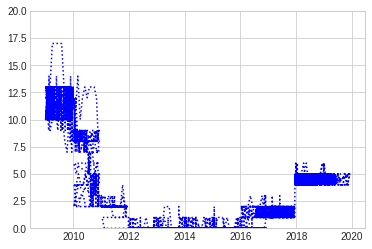

In [87]:
# plot do total de dados vazios por linha
fig = plt.figure()
ax = plt.axes()
ax.plot(market1['Date'].values, count_nulls,':b')
plt.ylim(0,20)

In [85]:
market1.isnull().sum()

Date                            0
GoogleTrends                  563
Bitcoin_DD                   1316
MarketPrice                   591
TradeVolume                   571
NewPosts                      894
NewMembers                    969
PageViews                    1570
Difficulty                      5
CostPerTransaction            591
CostPerTransactionPercent     263
EstimTransactionVolume        263
MedConfirmationTime          1063
NumOfAddresses                  5
NumOfTransactions               5
OutputVolume                    5
TotalBitcoins                 486
TransactionFees               631
TransactionFeesUSD            676
DowJones                        0
EURUSD                        133
USDEUR                          0
OilPrice                        0
dtype: int64